In [15]:
import torch
DATA = 'Fashion'
prefix = 'fashion_dnn_'
traing = True
epochs = 200
batch_size = 64
leaks_loss = None
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [16]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
pip install import-ipynb

In [18]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [19]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

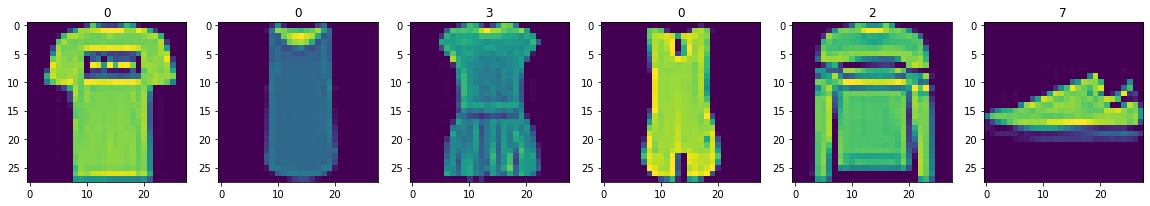

In [20]:
plot_samples(trainSet, None)

In [21]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(1, 6, 5, 1, 2), #28
            nn.BatchNorm2d(6),
            BinaryRelu(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            #nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [22]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [23]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(1)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.50115281 and Accuracy: 80.87%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.42521471 and Accuracy: 83.80%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.40894818 and Accuracy: 84.94%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.37785572 and Accuracy: 86.00%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.36608616 and Accuracy: 86.21%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.34877867 and Accuracy: 86.73%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.34758860 and Accuracy: 87.01%
Saving the model state dictionary for Epoch: 11 with Validation loss: 0.34758696 and Accuracy: 87.41%
Saving the model state dictionary for Epoch: 12 with Validation loss: 0.33740589 and Accuracy: 87.13%
Saving the model state dictionary for Epoch: 15 with Validation loss: 0.33538514 and Acc

In [24]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8954, device='cuda:0')


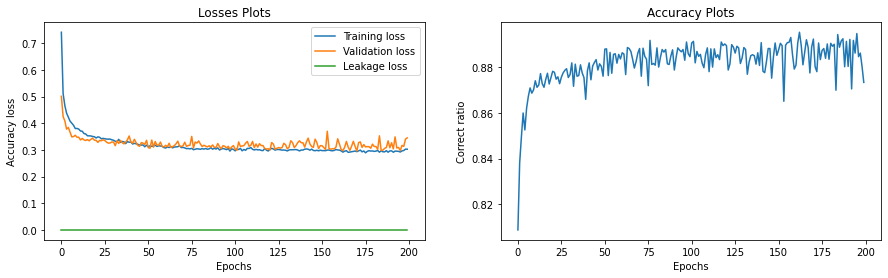

In [25]:
plot_losses()


Test accuracy: 0.8966666666666666


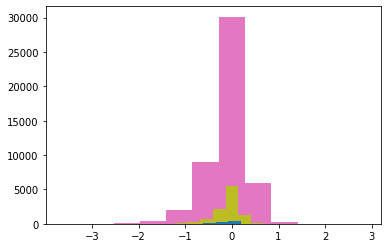

In [26]:
test_model()

##Measuring Privacy Preserving

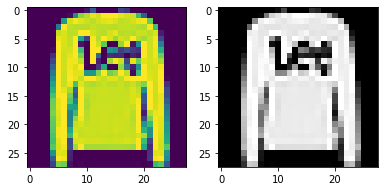

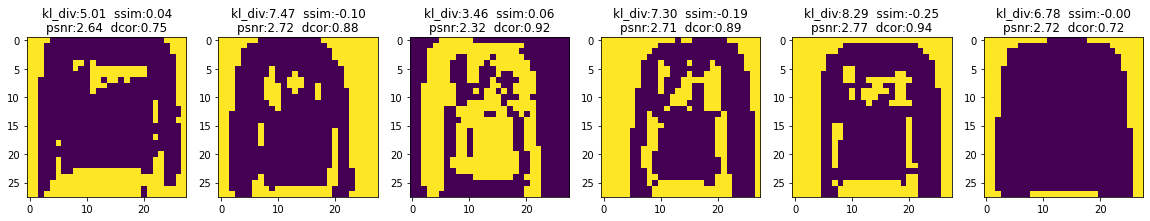

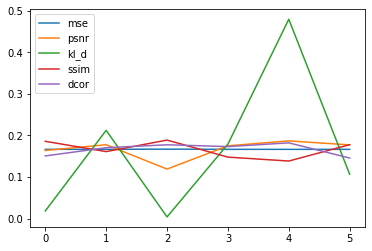

In [27]:
plot_measure(measure_image(testSet[1][0]))


tensor(4.7856, device='cuda:0') 0.8804492949515516 tensor(0.1084, device='cuda:0')


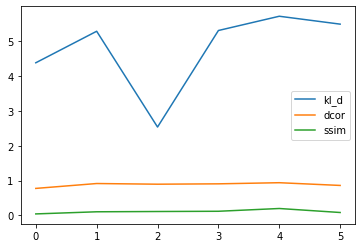

In [28]:
plot_measures(measure_images())